# import libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import pandas as pd
import geopandas as gpd
import osmnx


# load data & data cleaning

In [22]:
# load the necessary data here and transform to a UTM projection
admin = gpd.read_file("C:/Users/charl/OneDrive/Desktop/ulster/EGM722_programming/git/egm722_project/data/Stadtteile_Hamburg.shp")
stats = pd.read_csv("C:/Users/charl/OneDrive/Desktop/ulster/EGM722_programming/git/egm722_project/data/Stadtteilprofile2022.csv",encoding="Latin-1", delimiter=";" )
#noise = pd.read_gml("C:/Users/charl/OneDrive/Desktop/ulster/EGM722_programming/git/egm722_project/data/laermkarten_HH_2018-11-19.gml" )

print(admin.head())
print(stats.head())

   OBJECTID bezirk     bezirk_nam        stadtteil_ stadttei_1 stadttei_2   
0         1      1  Hamburg-Mitte  Hamburg-Altstadt      02101        101  \
1         2      1  Hamburg-Mitte         HafenCity      02102        102   
2         3      1  Hamburg-Mitte          Neustadt      02103        103   
3         4      1  Hamburg-Mitte         St. Pauli      02104        104   
4         5      1  Hamburg-Mitte         St. Georg      02105        105   

     SHAPE_Leng    SHAPE_Area   
0   9028.180532  3.676562e+06  \
1  13902.691334  6.860720e+06   
2  11133.923114  6.395226e+06   
3  15968.675123  6.343533e+06   
4   9795.650670  5.155061e+06   

                                            geometry  
0  POLYGON ((1113865.821 7085107.333, 1113978.324...  
1  POLYGON ((1113043.882 7082944.386, 1112901.932...  
2  POLYGON ((1112508.476 7085835.161, 1112319.283...  
3  POLYGON ((1109116.549 7084327.397, 1109001.027...  
4  POLYGON ((1114563.830 7085359.663, 1114541.839...  
       ï

In [25]:
#drop unecessary columns 
stats = stats.drop(stats.columns[[12,13]], axis=1) # df.columns is zero-based pd.Index
#print(stats.head())


       ï»¿Stadtteil Anzahl der Einwohner:innen   
0  Hamburg-Altstadt                  2 358      \
1         HafenCity                  6 302       
2          Neustadt                 12 611       
3         St. Pauli                 21 803       
4         St. Georg                 11 467       

  Anzahl der Kinder und Jugendlichen unter 18 Jahren   
0                                            297      \
1                                          1 187       
2                                          1 414       
3                                          2 849       
4                                          1 189       

  Anzahl Ã¤lterer Einwohner:innen Ã¼ber 64 Jahren   
0                                         257      \
1                                         598       
2                                       1 894       
3                                       2 245       
4                                       1 602       

  Anzahl auslÃ¤ndischer Einwohner:innen   


In [26]:
# rename columns in stat data set
stats.columns = ['district','inhabitants', 'pop<18', 'pop>64y', 'foreignResidents', 'migration_backg', 'pop_hh','hh_kids', 'working_pop', '%working_pop', 'unemployed', '%unemployed','null']
print(stats.head())

           district  inhabitants      pop<18     pop>64y foreignResidents   
0  Hamburg-Altstadt    2 358         297         257              519      \
1         HafenCity    6 302       1 187         598              884       
2          Neustadt   12 611       1 414       1 894            2 477       
3         St. Pauli   21 803       2 849       2 245            4 535       
4         St. Georg   11 467       1 189       1 602            2 689       

  migration_backg       pop_hh   hh_kids working_pop %working_pop unemployed   
0       1 046        1 507       1,6         192        1 240       67,6      \
1       2 429        2 892       2,2         755        2 811       61,1       
2       4 602        8 620       1,5         968        6 079       64,0       
3       8 045       14 593       1,5       1 856        9 772       57,0       
4       4 570        7 353       1,5         758        5 303       60,1       

  %unemployed  null  
0      98       NaN  
1     144   

In [47]:
#joined population data with shapefile of admin boundaries and dropped additional columns in the admin dataset
admin_pop = pd.merge(admin,stats, left_on='stadtteil_', right_on='district', how = 'outer')
admin_pop.drop(columns=['district','OBJECTID','bezirk', 'stadttei_1', 'stadttei_2','null'],axis=1, inplace=True)

print(admin_pop.head())


      bezirk_nam        stadtteil_    SHAPE_Leng    SHAPE_Area   
0  Hamburg-Mitte  Hamburg-Altstadt   9028.180532  3.676562e+06  \
1  Hamburg-Mitte         HafenCity  13902.691334  6.860720e+06   
2  Hamburg-Mitte          Neustadt  11133.923114  6.395226e+06   
3  Hamburg-Mitte         St. Pauli  15968.675123  6.343533e+06   
4  Hamburg-Mitte         St. Georg   9795.650670  5.155061e+06   

                                            geometry  inhabitants      pop<18   
0  POLYGON ((1113865.821 7085107.333, 1113978.324...    2 358         297      \
1  POLYGON ((1113043.882 7082944.386, 1112901.932...    6 302       1 187       
2  POLYGON ((1112508.476 7085835.161, 1112319.283...   12 611       1 414       
3  POLYGON ((1109116.549 7084327.397, 1109001.027...   21 803       2 849       
4  POLYGON ((1114563.830 7085359.663, 1114541.839...   11 467       1 189       

      pop>64y foreignResidents migration_backg       pop_hh   hh_kids   
0     257              519           1 046 

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

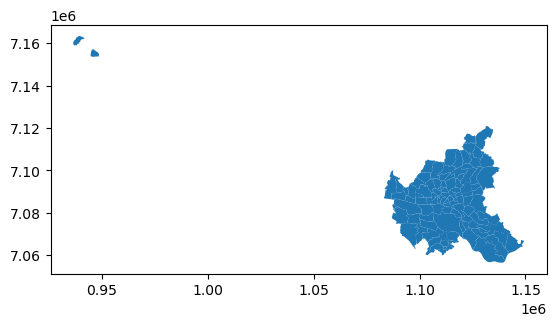

In [49]:
#calculation of statiscts in joined data frame for visualization
#admin_pop.plot()
